## 王者荣耀英雄分类

步骤：
- 预处理数据
- 层次聚类
- 利用PCA来选择变量，再做一次层次聚类

### 预处理数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
heroes = pd.read_csv('heros1.csv', encoding = 'utf-8-sig')
heroes.head(3)

,英雄,最大生命,生命成长,初始生命,最大法力,法力成长,初始法力,最高物攻,物攻成长,初始物攻,...,最大每5秒回血,每5秒回血成长,初始每5秒回血,最大每5秒回蓝,每5秒回蓝成长,初始每5秒回蓝,最大攻速,攻击范围,主要定位,次要定位
0,夏侯惇,7350,288.8,3307,1746,94,430,321,11.57,159,...,98,3.357,51,37,1.571,15,28.00%,近战,坦克,战士
1,钟无艳,7000,275.0,3150,1760,95,430,318,11.00,164,...,92,3.143,48,37,1.571,15,14.00%,近战,战士,坦克
2,张飞,8341,329.4,3450,100,0,100,301,10.57,153,...,115,4.143,57,5,0.000,5,14.00%,近战,坦克,辅助


In [3]:
data = heroes.iloc[:,1:-2].copy()
data.head(3)

,最大生命,生命成长,初始生命,最大法力,法力成长,初始法力,最高物攻,物攻成长,初始物攻,最大物防,物防成长,初始物防,最大每5秒回血,每5秒回血成长,初始每5秒回血,最大每5秒回蓝,每5秒回蓝成长,初始每5秒回蓝,最大攻速,攻击范围
0,7350,288.8,3307,1746,94,430,321,11.57,159,397,21.14,101,98,3.357,51,37,1.571,15,28.00%,近战
1,7000,275.0,3150,1760,95,430,318,11.00,164,409,22.07,100,92,3.143,48,37,1.571,15,14.00%,近战
2,8341,329.4,3450,100,0,100,301,10.57,153,504,27.07,125,115,4.143,57,5,0.000,5,14.00%,近战


In [4]:
# 修改攻击范围文本为 0 = 近战，1 = 远程
def attack_range(x):
    if x == '近战':
        return 0
    else:
        return 1

data['攻击范围'] = data['攻击范围'].apply(lambda x: attack_range(x))

# 修改最大攻速为 0 = 近战，1 = 远程
def attack_speed(x):
    return float(x[:-1])

data['最大攻速'] = data['最大攻速'].apply(lambda x: attack_speed(x))
data.head(3)

,最大生命,生命成长,初始生命,最大法力,法力成长,初始法力,最高物攻,物攻成长,初始物攻,最大物防,物防成长,初始物防,最大每5秒回血,每5秒回血成长,初始每5秒回血,最大每5秒回蓝,每5秒回蓝成长,初始每5秒回蓝,最大攻速,攻击范围
0,7350,288.8,3307,1746,94,430,321,11.57,159,397,21.14,101,98,3.357,51,37,1.571,15,28.0,0
1,7000,275.0,3150,1760,95,430,318,11.00,164,409,22.07,100,92,3.143,48,37,1.571,15,14.0,0
2,8341,329.4,3450,100,0,100,301,10.57,153,504,27.07,125,115,4.143,57,5,0.000,5,14.0,0


标准化数据

In [5]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head(3)

,最大生命,生命成长,初始生命,最大法力,法力成长,初始法力,最高物攻,物攻成长,初始物攻,最大物防,物防成长,初始物防,最大每5秒回血,每5秒回血成长,初始每5秒回血,最大每5秒回蓝,每5秒回蓝成长,初始每5秒回蓝,最大攻速,攻击范围
0,0.887440,0.034870,0.399287,0.210812,0.011350,0.051918,0.038758,0.001397,0.019198,0.047934,0.002552,0.012195,0.011833,0.000405,0.006158,0.004467,0.000190,0.001811,0.003381,0.0
1,0.884673,0.034755,0.398103,0.222432,0.012006,0.054344,0.040189,0.001390,0.020727,0.051690,0.002789,0.012638,0.011627,0.000397,0.006066,0.004676,0.000199,0.001896,0.001769,0.0
2,0.921084,0.036375,0.380978,0.011043,0.000000,0.011043,0.033239,0.001167,0.016896,0.055656,0.002989,0.013804,0.012699,0.000458,0.006294,0.000552,0.000000,0.000552,0.001546,0.0


In [6]:
# help(shc.linkage)

### Hierarchical clustering(层次聚类)

Dendrogram(系统树图)

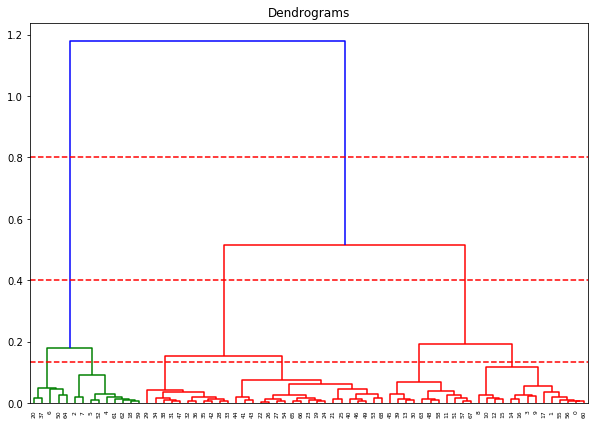

In [7]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward')) # ward
plt.axhline(y=0.8, color='r', linestyle='--')
plt.axhline(y=0.134, color='r', linestyle='--')
plt.axhline(y=0.4, color='r', linestyle='--')

In [8]:
def plot_cluster(k,data_scaled):
    from sklearn.cluster import AgglomerativeClustering
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')  
    cluster.fit_predict(data_scaled)
    plt.figure(figsize=(10, 7))  
    plt.scatter(data_scaled['最大生命'], data_scaled['最大法力'], c=cluster.labels_) 
    return  cluster.fit_predict(data_scaled)

分类可视化

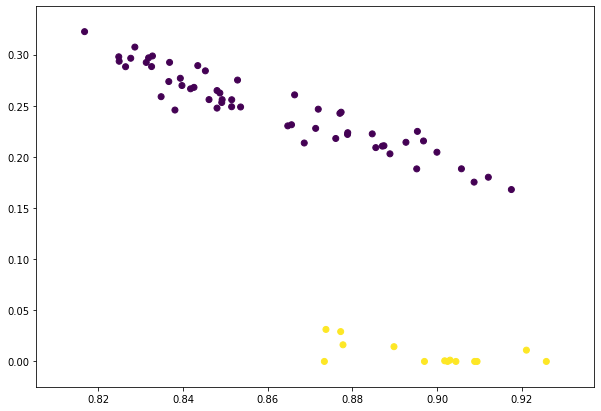

In [9]:
cluster_2 = plot_cluster(2,data_scaled)

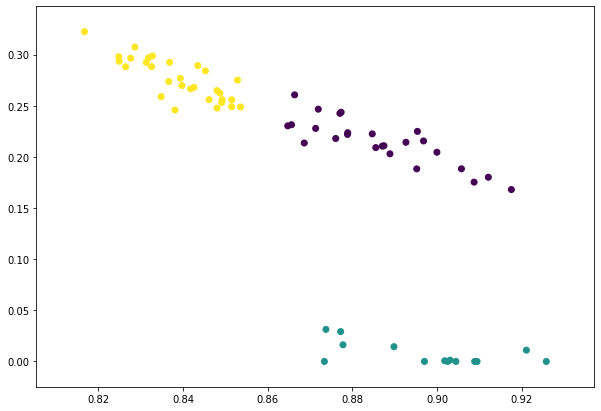

In [10]:
cluster_3 = plot_cluster(3,data_scaled)

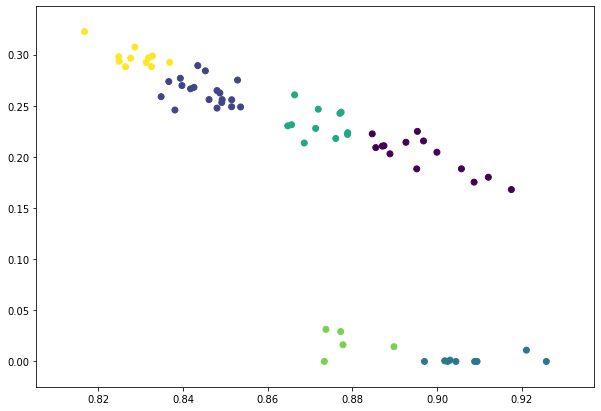

In [11]:
cluster_6 = plot_cluster(6,data_scaled)

#### 分组结果

In [12]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [13]:
def df_value_counts(info,cluster):
    df = pd.DataFrame(info[info['预测定位'] == cluster]['主要定位'].value_counts())
    df.columns = [f'Cluster {cluster} 所含真实定位数量']
    return df

分两组

In [14]:
info = heroes[['英雄','主要定位']].copy()
info['预测定位'] = cluster_2
# display_side_by_side(info[info['预测定位'] == 0].head(15),info[info['预测定位'] == 1])

In [15]:
display_side_by_side(df_value_counts(info,0), df_value_counts(info,1))

,Cluster 0 所含真实定位数量
法师,17
战士,11
射手,9
坦克,8
辅助,6
刺客,4
,Cluster 1 所含真实定位数量
战士,7
刺客,2
坦克,2


分三组

In [16]:
info['预测定位'] = cluster_3
# display_side_by_side(info[info['预测定位'] == 0],info[info['预测定位'] == 1],info[info['预测定位'] == 2])

In [17]:
display_side_by_side(df_value_counts(info,0), df_value_counts(info,1), df_value_counts(info,2))

,Cluster 0 所含真实定位数量
战士,11
坦克,8
辅助,4
法师,2
,Cluster 1 所含真实定位数量
战士,7
刺客,2
坦克,2
法师,2
射手,1


分六组

In [18]:
info['预测定位'] = cluster_6
display_side_by_side(df_value_counts(info,0), df_value_counts(info,1), df_value_counts(info,2),
                     df_value_counts(info,3),df_value_counts(info,4),df_value_counts(info,5))

,Cluster 0 所含真实定位数量
坦克,8
战士,4
辅助,1
法师,1
,Cluster 1 所含真实定位数量
射手,9
法师,5
刺客,4
辅助,1
,Cluster 2 所含真实定位数量


### 降维
- PCA & Feature Extraction

In [19]:
from sklearn.decomposition import PCA

#Define two components  
pca=PCA(n_components=20) 
pca_data=pca.fit_transform(data_scaled) 
principalDf=pd.DataFrame(data=pca_data,columns=[f'PC {i}' for i in range(1,21)]) 
principalDf.head(2)

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15,PC 16,PC 17,PC 18,PC 19,PC 20
0,-0.004116,0.038238,0.000164,0.000908,-0.003725,0.001066,-0.000541,0.000237,0.000027,0.000081,0.000160,0.000170,-0.000056,-0.000033,0.000019,2.653457e-07,3.933326e-07,-5.835378e-08,-1.095748e-08,8.683639e-18
1,-0.016153,0.039912,0.002085,0.001351,0.000260,0.001267,0.000505,-0.001413,0.000163,-0.000014,-0.000485,-0.000171,-0.000059,0.000005,0.000011,9.210306e-08,1.671372e-07,-3.377346e-08,1.336835e-08,-3.294143e-18


In [20]:
# plot_df = principalDf[['PC 1','PC 2']].copy()
# # plot
# x = plot_df['PC 1']
# y = plot_df['PC 2']

# plt.figure(figsize = (15,8))
# plt.scatter(x,y,s=60) 

# # legend(['$ŷ_(t)$','$y_(t)$','$ŷ_(t)$']) 
# plt.ylabel('PC 2') 
# plt.xlabel('PC 1')
# plt.title('')

In [21]:
target = heroes[['主要定位']].copy()

In [22]:
finalDf=pd.concat([principalDf,target],axis=1)
finalDf.head(2)

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 12,PC 13,PC 14,PC 15,PC 16,PC 17,PC 18,PC 19,PC 20,主要定位
0,-0.004116,0.038238,0.000164,0.000908,-0.003725,0.001066,-0.000541,0.000237,0.000027,0.000081,...,0.000170,-0.000056,-0.000033,0.000019,2.653457e-07,3.933326e-07,-5.835378e-08,-1.095748e-08,8.683639e-18,坦克
1,-0.016153,0.039912,0.002085,0.001351,0.000260,0.001267,0.000505,-0.001413,0.000163,-0.000014,...,-0.000171,-0.000059,0.000005,0.000011,9.210306e-08,1.671372e-07,-3.377346e-08,1.336835e-08,-3.294143e-18,战士


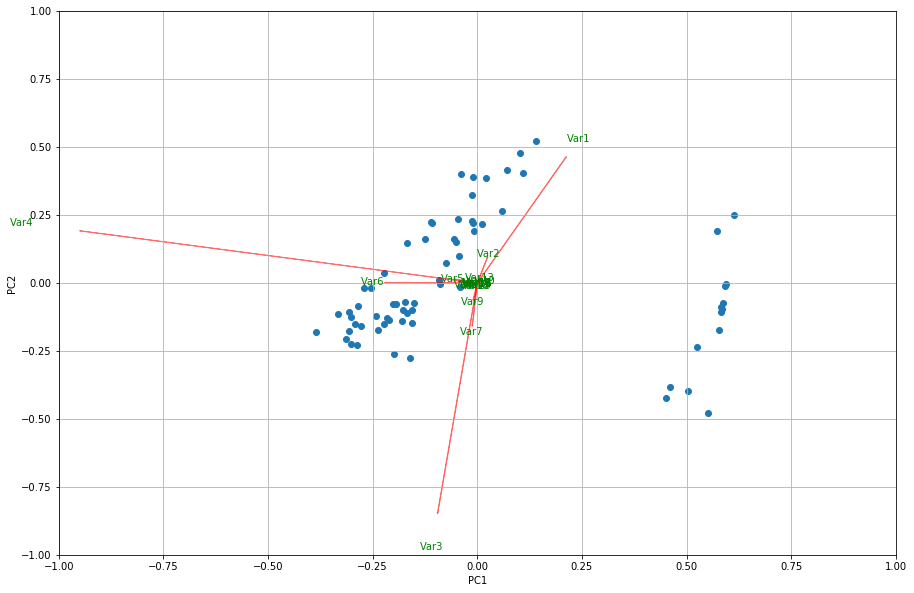

In [23]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.figure(figsize=[15,10])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pca_data[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [24]:
# np.array([list(data.columns),[i for i in range(1,21)]]).T

| Var 4 | Var 3 | Var 1 | Var 6 | Var 7 | Var 2 |
| --- | --- | --- | --- | --- | --- |
| 最大法力 | 初始生命 | 最大生命 | 初始法力 | 最高物攻 | 生命成长 |

根据PCA的图和上面号码对应的属性，我们可以知道上表这些是最能分别英雄类型的属性。
                                                
- 其中“最大法力(var 4)”和“初始法力(var 6)”是能最明显的把英雄们分为两类。
- 而[“最大生命(var 1)”,“生命成长(var 2)”] 和 [“初始生命(var 3)”,“最高物攻(var 7)”] 是能把英雄们分成三类的关键。                              

接下来我们用这些属性来进行层次聚类

In [25]:
new_data = data_scaled[['最大法力','初始生命','最大生命','初始法力','最高物攻','生命成长']].copy()

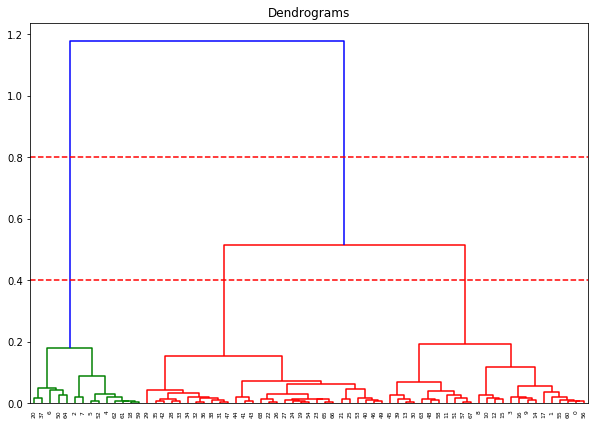

In [26]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(new_data, method='ward')) # ward
plt.axhline(y=0.8, color='r', linestyle='--')
# plt.axhline(y=0.134, color='r', linestyle='--')
plt.axhline(y=0.4, color='r', linestyle='--')

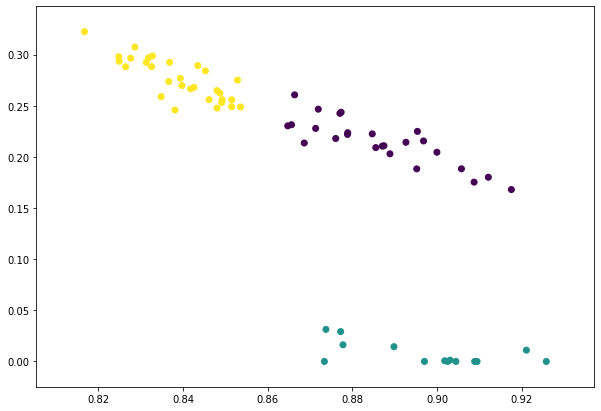

In [27]:
cluster_3 = plot_cluster(3,new_data)

结果和之前差不多

根据以上结果，我们可以把英雄可以分成两组或三组。

不过这是大方向的组别。因为根据游戏的复杂度，有些英雄即使属性上是相近的，但是他们可能因为别的原因（例如：技能差别, 英雄的设计背景等）被定位为不同的类型。